#  Linear Models for Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

np.random.seed(1234)

In [2]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

## Discriminant Functions

###  Least squares for classification
$$\boldsymbol{y_{ls}} = \boldsymbol{X} \boldsymbol{w}$$

where,

$$ \boldsymbol{w}  = (\boldsymbol{X}^T \boldsymbol{X})^{-1}\boldsymbol{X}^T \boldsymbol{y} $$

Apply least square classification to the following dataset. Use polynomial basis functions.

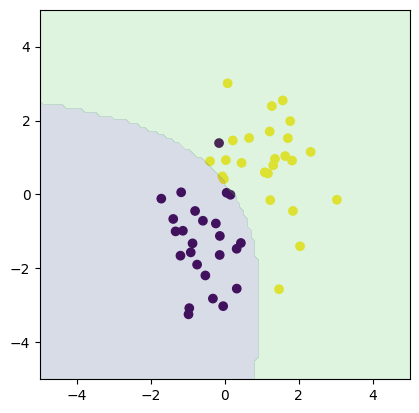

In [3]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(2)
X_train = feature.fit_transform(x_train)
X_test = feature.fit_transform(x_test)

y_train.shape = (len(y_train),1)
enc = OneHotEncoder()
enc.fit(y_train)
enc_y_train = enc.transform(y_train).toarray()

w = np.matmul(np.linalg.pinv(X_train), enc_y_train)
y = np.argmax(X_test @ w, axis=-1)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Logistic regression

The gradient and Hessian will be:

$$ \boldsymbol{g} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w}) - \boldsymbol{y})$$
$$ \boldsymbol{H} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w})(1-{\phi}(\boldsymbol{X} \boldsymbol{w})))\boldsymbol{X}$$

We can compute $w_{MAP}$ using iterative methods:

1. First order: $w_{t+1} = w_{t} -\eta g_{t}$

2. Second order: $w_{t+1} = w_{t} -\eta H^{-1}_{t}g_{t}$

$$\boldsymbol{y_{lr}} = {\phi}(\boldsymbol{X} \boldsymbol{w})\lessgtr 0.5$$

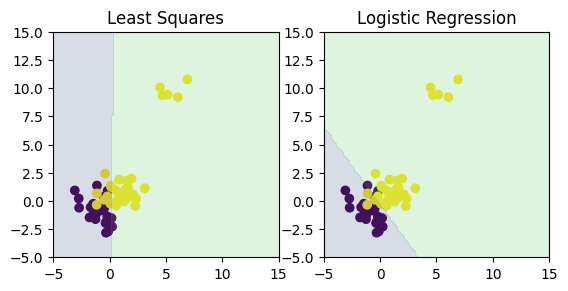

In [4]:
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.fit_transform(x_train)
X_test = feature.fit_transform(x_test)

def sigmoid(a):
    return np.tanh(a * 0.5) * 0.5 + 0.5

max_iter = 100
w = np.zeros(np.size(X_train, 1))

for i in range(max_iter):
    phi = sigmoid(X_train @ w)
    grad = X_train.T @ (phi - y_train)
    hessian = (X_train.T * phi * (1 - phi)) @ X_train

    w -= np.linalg.solve(hessian, grad)

        
y_lr = sigmoid(X_test @ w)> 0.5

y_train.shape = (len(y_train),1)
enc = OneHotEncoder()
enc.fit(y_train)
enc_y_train = enc.transform(y_train).toarray()

beta = np.matmul(np.linalg.pinv(X_train), enc_y_train)
y_ls = np.argmax(X_test @ beta, axis=-1)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

##  Probabilistic Discriminative Models

###  Logistic Regression
The gradient and Hessian will be:

$$ \boldsymbol{g} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w}) - \boldsymbol{y})$$
$$ \boldsymbol{H} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w})(1-{\phi}(\boldsymbol{X} \boldsymbol{w})))\boldsymbol{X}$$


We can compute $w_{MAP}$ using iterative methods:

1. First order: $w_{t+1} = w_{t} -\eta g_{t}$

2. Second order: $w_{t+1} = w_{t} -\eta H^{-1}_{t}g_{t}$

$$\boldsymbol{y_{lr}} = {\phi}(\boldsymbol{X} \boldsymbol{w})$$

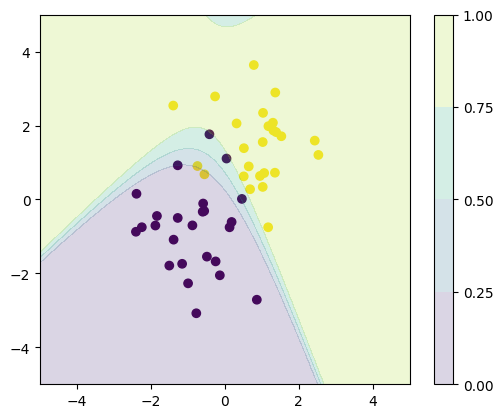

In [5]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(2)
X_train = feature.fit_transform(x_train)
X_test = feature.fit_transform(x_test)

def sigmoid(a):
    return np.tanh(a * 0.5) * 0.5 + 0.5

max_iter = 100
w = np.zeros(np.size(X_train, 1))

for i in range(max_iter):
    w_prev = np.copy(w)
    y = sigmoid(X_train @ w)
    grad = X_train.T @ (y - y_train)
    hessian = (X_train.T * y * (1 - y)) @ X_train
    try:
        w -= np.linalg.solve(hessian, grad)
    except np.linalg.LinAlgError:
        break
    if np.allclose(w, w_prev):
        break
        
y_prob = sigmoid(X_test @ w)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_prob.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

###  Bayesian Logistic Regression

With a Gaussian prior $p(w)=\mathcal{N}(w|0,\alpha^{-1})$, the gradient and Hessian will be:

$$ \boldsymbol{g} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w}) - \boldsymbol{y})$$
$$ \boldsymbol{H} = \boldsymbol{X^{T}}({\phi}(\boldsymbol{X} \boldsymbol{w})(1-{\phi}(\boldsymbol{X} \boldsymbol{w})))\boldsymbol{X}$$

We can compute $w_{MAP}$ using iterative methods:

1. First order: $w_{t+1} = w_{t} -\eta g_{t}$

2. Second order: $w_{t+1} = w_{t} -\eta H^{-1}_{t}g_{t}$

We approximate the predictive distribution with the probit function. Then,
$$ p(y^{*}=1\mid \boldsymbol{x}^{*}, \boldsymbol{X}, \boldsymbol{y})=\phi(\frac{\boldsymbol{\mu}}{\sqrt{\pi/8+\boldsymbol{\sigma}^{2}}}) $$
where,
$$ \boldsymbol{\mu} = \boldsymbol{w}_{map}^{T}\boldsymbol{x}^{*} $$
$$ \boldsymbol{\sigma^{2}} = \boldsymbol{x}^{*^{T}}\boldsymbol{H}^{-1}\boldsymbol{x}^{*} $$

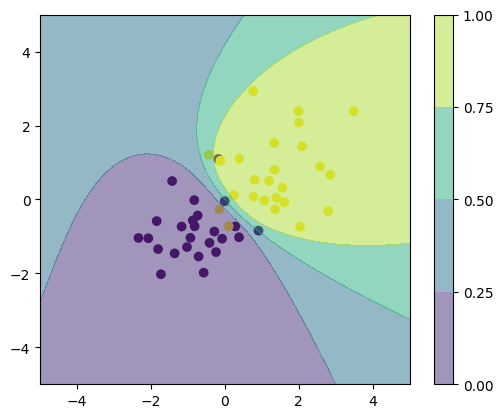

In [6]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(2)
X_train = feature.fit_transform(x_train)
X_test = feature.fit_transform(x_test)

def sigmoid(a):
    return np.tanh(a * 0.5) * 0.5 + 0.5
max_iter = 100
alpha=1.

w = np.zeros(np.size(X_train, 1))
eye = np.eye(np.size(X_train, 1))
w_mean = np.copy(w)
w_precision = alpha * eye

for i in range(max_iter):
    w_prev = np.copy(w)
    y = sigmoid(X_train @ w)
    grad = (X_train.T @ (y - y_train) + w_precision @ (w - w_mean))
    hessian = (X_train.T * y * (1 - y)) @ X_train + w_precision
    try:
        w -= np.linalg.solve(hessian, grad)
    except np.linalg.LinAlgError:
        break
    if np.allclose(w, w_prev):
        break
w_mean = w
w_precision = hessian

mu_test = X_test @ w_mean
var_test = np.sum(np.linalg.solve(w_precision, X_test.T).T * X_test, axis=1)
y = sigmoid(mu_test / np.sqrt(np.pi/8 * var_test ))

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.5)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()